<a href="https://colab.research.google.com/github/LabSWPP12023S2G2/TPInicial/blob/main/testingplots-mental-health-post-COVID19-arg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Importamos librerias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [35]:
# Carga de dataset
url = 'https://raw.githubusercontent.com/LabSWPP12023S2G2/TPInicial/main/datasetUNC.csv'
data = pd.read_csv(url, delimiter=';')
columns_to_drop = ['SUB PERIODS', 'SEX']
data = data.drop(columns=columns_to_drop)
data = data.dropna(axis=0)
data.drop(data[data['PROVINCE'] == 'Otro'].index, inplace=True)
data.drop(data[data['PROVINCE'] == 'other'].index, inplace=True)
data.drop(data[data['EDUCATION'] == 'Otro'].index, inplace=True)

In [36]:
# Asignaciones para columnas no númericas
assignment_mapping = {
    'MENTAL DISORDER HISTORY': {'no': 0, 'yes': 50},
    'EDUCATION': {
        'Completed postgraduate': 30,
        'Incomplete tertiary or university': 60,
        'Completed high school': 70,
        'Incomplete postgraduate': 40,
        'Completed tertiary or university': 50,
        'Incomplete high school': 80,
        'Incomplete elementary school': 100,
        'Completed elementary school': 90
    },
    'SUIC ATTEMPT HISTORY': {'ideation': 50, 'no': 0, 'yes': 100},
    'LIVING WITH SOMEBODY': {'no': 20, 'yes': 0},
    'ECONOMIC INCOME': {'yes': 0, 'no': 50}
}

# Aplicamos las asignaciones
for column, mapping in assignment_mapping.items():
    data[column] = data[column].map(mapping)

In [37]:
# Función para asignar una región a cada provincia
def assign_region(province):
    if province in ['Corrientes', 'Chaco', 'Misiones', 'Formosa', 'Entre Ríos']:
        return 'Nordeste-Litoral'
    elif province in ['Tucumán', 'Jujuy', 'Salta', 'Catamarca', 'Santiago del Estero']:
        return 'Noroeste'
    elif province in ['San Luis', 'San Juan', 'Mendoza', 'La Rioja']:
        return 'Cuyo'
    elif province in ['Neuquén', 'Río Negro', 'La Pampa']:
        return 'Patagonia Centro-Norte'
    elif province in ['Tierra del Fuego', 'Santa Cruz', 'Chubut']:
        return 'Patagonia Centro-Sur'
    elif province == 'Santa Fe':
        return 'Santa Fe'
    elif province == 'Buenos Aires provincia':
        return 'Buenos Aires'
    elif province == 'Córdoba':
        return 'Córdoba'
    else:
        return 'CABA'

# Aplicamos la función a la columna 'PROVINCE' y guardamos el resultado en una nueva columna 'REGION'
data['REGION'] = data['PROVINCE'].apply(assign_region)

# Crea un LabelEncoder para codificar la columna 'REGION'
label_encoder = LabelEncoder()
data['REGION ENCODED'] = label_encoder.fit_transform(data['REGION'])

In [38]:
# Calcula el promedio de las variables excepto "SUIC RISK"
mean = data.drop(['REGION ENCODED', 'PROVINCE', 'REGION'], axis=1).mean(axis=1)
data['PROM SUIC'] = mean
data_ref = data[['SUIC RISK', 'PROM SUIC']]

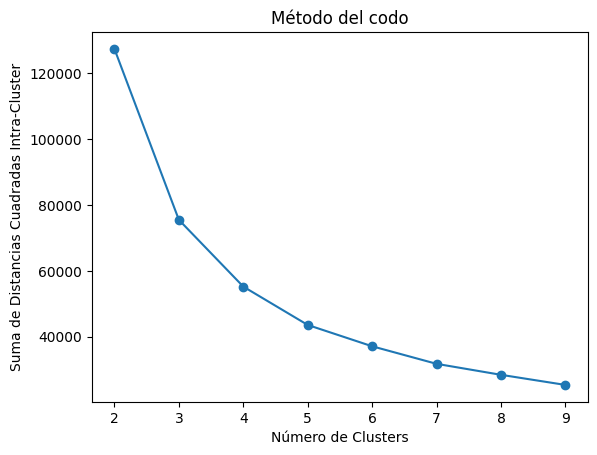

In [39]:
# Método del codo
inertia_values = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=0)
    kmeans.fit(data_ref)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(2, 10), inertia_values, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de Distancias Cuadradas Intra-Cluster')
plt.title('Método del codo')
plt.show()

In [ ]:
# Análisis de siluetas
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=0)
    cluster_labels = kmeans.fit_predict(data_ref)
    silhouette_avg = silhouette_score(data_ref, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    sample_silhouette_values = silhouette_samples(data_ref, cluster_labels)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de silueta promedio')
plt.title('Análisis de siluetas')
plt.grid(True)
plt.show()

In [40]:
# Aplicamos K-Means para clasificar las regiones en grupos
kmeans = KMeans(n_clusters=3, n_init=100, random_state=0).fit(data_ref)
data_ref['Cluster'] = kmeans.labels_

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=80)
tsne_coordinates = tsne.fit_transform(data_ref)
data_ref['tsne_x'] = tsne_coordinates[:, 0]
data_ref['tsne_y'] = tsne_coordinates[:, 1]

<ipython-input-40-3f6592724961>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-3f6592724961>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-3f6592724961>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [6]:
# Aplicamos K-Means para clasificar las regiones en grupos
kmeans = KMeans(n_clusters=3, n_init=100, random_state=0).fit(data_ref)
data_ref['Cluster'] = kmeans.labels_

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=3, random_state=0, perplexity=80)
tsne_coordinates = tsne.fit_transform(data_ref)
data_ref['tsne_x'] = tsne_coordinates[:, 0]
data_ref['tsne_y'] = tsne_coordinates[:, 1]
data_ref['tsne_z'] = tsne_coordinates[:, 2]

<ipython-input-6-2a28acd38d48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ref['Cluster'] = kmeans.labels_
<ipython-input-6-2a28acd38d48>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ref['tsne_x'] = tsne_coordinates[:, 0]
<ipython-input-6-2a28acd38d48>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [7]:
# Verifica si clasifica bien elementos nuevos
x_in = np.asarray([0 ,10]).reshape(1,-1)
predicts = kmeans.predict(x_in)
predicts[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


1

In [ ]:
# Vuelvo a agregar columnas para posterior visualizacion
columns_to_copy = ['PROVINCE', 'EDUCATION', 'AGE', 'MENTAL DISORDER HISTORY', 'SUIC ATTEMPT HISTORY',
                   'LIVING WITH SOMEBODY', 'ECONOMIC INCOME', 'DEPRESSION', 'SUIC RISK', 'ANXIETY STATE',
                   'ANXIETY TRAIT', 'REGION']
for col in columns_to_copy:
    data_ref[col] = data[col].copy()

# Generación de colores para los clusters
cluster_colors = plt.cm.tab10.colors

In [42]:
# Diccionario para mapear los nombres de los clusters
cluster_names = {
    0: 'Riesgo medio',
    1: 'Riesgo bajo',
    2: 'Riesgo alto',
}

In [ ]:
# Crear un scatter plot
plt.figure(figsize=(12, 8))
unique_clusters = np.unique(kmeans.labels_)
for cluster in unique_clusters:
    cluster_data = data_ref[data_ref['Cluster'] == cluster]
    cluster_name = cluster_names.get(cluster, f'Cluster {cluster}')
    plt.scatter(cluster_data['tsne_x'], cluster_data['tsne_y'],
                label=cluster_name, alpha=0.7, s=50)

# Crear leyenda personalizada
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=f'C{cluster}', markersize=10, label=cluster_names.get(cluster, f'Cluster {cluster}')) for cluster in unique_clusters]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.05, 1))
plt.title('Clustering con K-Means (3 clústers) y t-SNE (80 de perplejidad) de regiones y provincias')
plt.xlabel('t-SNE x')
plt.ylabel('t-SNE y')
plt.show()

In [43]:
data_ref

,SUIC RISK,PROM SUIC,Cluster,tsne_x,tsne_y,PROVINCE,EDUCATION,AGE,MENTAL DISORDER HISTORY,SUIC ATTEMPT HISTORY,LIVING WITH SOMEBODY,ECONOMIC INCOME,DEPRESSION,ANXIETY STATE,ANXIETY TRAIT,REGION
0,37,28.2,0,10.980763,0.018332,CABA (Buenos Aires capital),30,30,0,50,20,0,21,54,40,CABA
1,46,28.2,0,18.157673,1.230937,Tierra del Fuego,60,30,0,50,0,0,26,34,36,Patagonia Centro-Sur
2,21,27.0,1,-5.841071,-5.358013,Jujuy,70,39,50,0,20,0,8,33,29,Noroeste
3,70,33.3,2,31.276928,0.029456,Jujuy,60,36,0,0,0,50,27,42,48,Noroeste
5,4,11.5,1,-29.738510,-7.370681,Córdoba,30,35,0,0,0,0,9,25,12,Córdoba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,80,37.7,2,33.498039,-0.877119,Córdoba,30,28,0,100,0,0,41,51,47,Córdoba
1096,19,17.4,1,-15.129104,1.666536,Córdoba,50,39,0,0,0,0,10,31,25,Córdoba
1097,25,16.5,1,-7.176195,7.670904,CABA (Buenos Aires capital),60,22,0,0,0,0,7,27,24,CABA
1098,30,14.1,0,-1.334908,9.828701,Córdoba,40,31,0,0,0,0,6,14,20,Córdoba


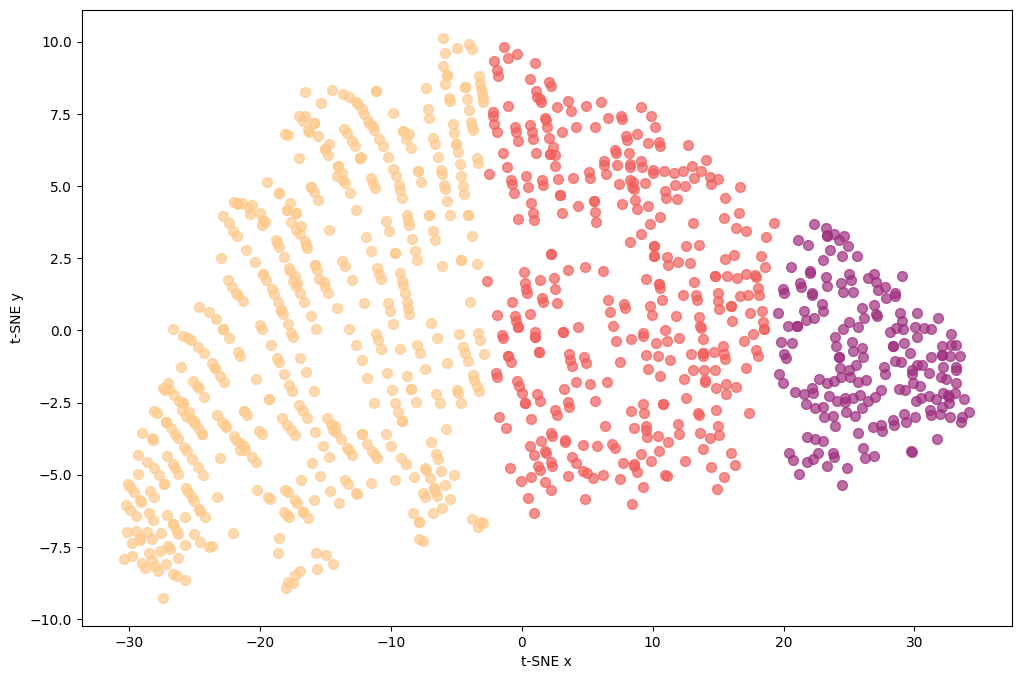

In [47]:
# Definir una lista de colores predeterminados
colors = ['#f1605d', '#feca8d', '#9e2f7f']

# Crear un scatter plot
plt.figure(figsize=(12, 8))
unique_clusters = np.unique(kmeans.labels_)
for i, cluster in enumerate(unique_clusters):
    cluster_data = data_ref[data_ref['Cluster'] == cluster]
    cluster_name = cluster_names.get(cluster, f'Cluster {cluster}')

    # Asignar color a cada cluster
    color = colors[i % len(colors)]

    plt.scatter(cluster_data['tsne_x'], cluster_data['tsne_y'],
                label=cluster_name, alpha=0.7, s=50, c=color)

plt.xlabel('t-SNE x')
plt.ylabel('t-SNE y')
plt.show()

In [48]:
data_ref

,SUIC RISK,PROM SUIC,Cluster,tsne_x,tsne_y,PROVINCE,EDUCATION,AGE,MENTAL DISORDER HISTORY,SUIC ATTEMPT HISTORY,LIVING WITH SOMEBODY,ECONOMIC INCOME,DEPRESSION,ANXIETY STATE,ANXIETY TRAIT,REGION
0,37,28.2,0,10.980763,0.018332,CABA (Buenos Aires capital),30,30,0,50,20,0,21,54,40,CABA
1,46,28.2,0,18.157673,1.230937,Tierra del Fuego,60,30,0,50,0,0,26,34,36,Patagonia Centro-Sur
2,21,27.0,1,-5.841071,-5.358013,Jujuy,70,39,50,0,20,0,8,33,29,Noroeste
3,70,33.3,2,31.276928,0.029456,Jujuy,60,36,0,0,0,50,27,42,48,Noroeste
5,4,11.5,1,-29.738510,-7.370681,Córdoba,30,35,0,0,0,0,9,25,12,Córdoba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,80,37.7,2,33.498039,-0.877119,Córdoba,30,28,0,100,0,0,41,51,47,Córdoba
1096,19,17.4,1,-15.129104,1.666536,Córdoba,50,39,0,0,0,0,10,31,25,Córdoba
1097,25,16.5,1,-7.176195,7.670904,CABA (Buenos Aires capital),60,22,0,0,0,0,7,27,24,CABA
1098,30,14.1,0,-1.334908,9.828701,Córdoba,40,31,0,0,0,0,6,14,20,Córdoba


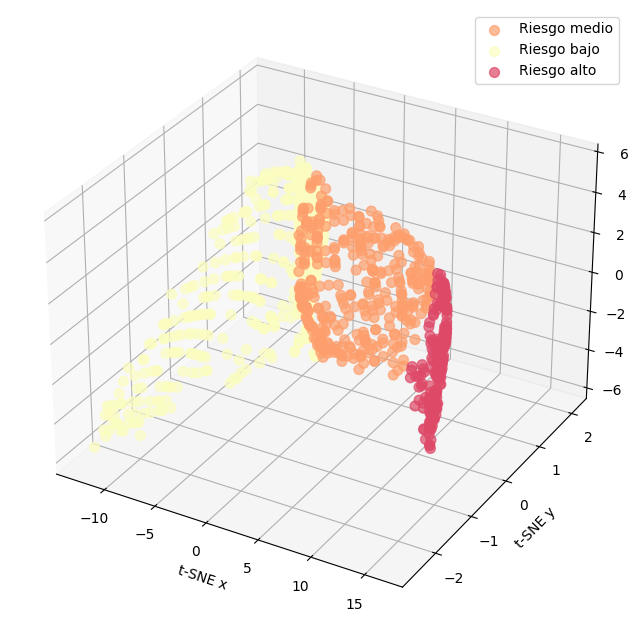

In [32]:
# Crear un scatter plot en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

unique_clusters = np.unique(kmeans.labels_)
colors = ['#fe9f6d', '#fcfdbf', '#de4968']

for i, cluster in enumerate(unique_clusters):
    cluster_data = data_ref[data_ref['Cluster'] == cluster]
    cluster_name = cluster_names.get(cluster, f'Cluster {cluster}')
    color = colors[i % len(colors)]

    ax.scatter(cluster_data['tsne_x'], cluster_data['tsne_y'], cluster_data['tsne_z'],
               label=cluster_name, alpha=0.7, s=50, c=color)

ax.set_xlabel('t-SNE x')
ax.set_ylabel('t-SNE y')
ax.set_zlabel('t-SNE z')
plt.legend()
plt.show()

In [31]:
import plotly.express as px

# Define una paleta de colores personalizada en formato hexadecimal
custom_palette = {'Riesgo medio': '#fe9f6d', 'Riesgo bajo': '#fcfdbf', 'Riesgo alto': '#de4968'}

# Mapea los nombres de los clusters a la paleta de colores
data_ref['Cluster Name'] = data_ref['Cluster'].map(cluster_names)

fig = px.scatter_3d(data_ref, x='tsne_x', y='tsne_y', z='tsne_z', color='Cluster Name', color_discrete_map=custom_palette,
                     opacity=0.7)

fig.update_layout(scene=dict(xaxis_title='t-SNE x', yaxis_title='t-SNE y', zaxis_title='t-SNE z'))
fig.show()


In [26]:
data_ref

,SUIC RISK,PROM SUIC,Cluster,tsne_x,tsne_y,tsne_z,PROVINCE,EDUCATION,AGE,MENTAL DISORDER HISTORY,SUIC ATTEMPT HISTORY,LIVING WITH SOMEBODY,ECONOMIC INCOME,DEPRESSION,ANXIETY STATE,ANXIETY TRAIT,REGION,Color,Cluster Name
0,37,28.2,0,5.080821,0.288398,0.081288,CABA (Buenos Aires capital),30,30,0,50,20,0,21,54,40,CABA,orange,Riesgo medio
1,46,28.2,0,8.626703,0.688181,0.865550,Tierra del Fuego,60,30,0,50,0,0,26,34,36,Patagonia Centro-Sur,orange,Riesgo medio
2,21,27.0,1,-2.187039,0.413541,-2.831638,Jujuy,70,39,50,0,20,0,8,33,29,Noroeste,green,Riesgo bajo
3,70,33.3,2,15.157846,-0.949863,-0.539860,Jujuy,60,36,0,0,0,50,27,42,48,Noroeste,red,Riesgo alto
5,4,11.5,1,-12.140379,-2.237303,-5.030755,Córdoba,30,35,0,0,0,0,9,25,12,Córdoba,green,Riesgo bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,80,37.7,2,16.133852,-1.347511,-1.223929,Córdoba,30,28,0,100,0,0,41,51,47,Córdoba,red,Riesgo alto
1096,19,17.4,1,-6.917542,2.099441,0.575447,Córdoba,50,39,0,0,0,0,10,31,25,Córdoba,green,Riesgo bajo
1097,25,16.5,1,-3.602209,0.549246,4.159727,CABA (Buenos Aires capital),60,22,0,0,0,0,7,27,24,CABA,green,Riesgo bajo
1098,30,14.1,0,-0.584159,0.199059,5.542198,Córdoba,40,31,0,0,0,0,6,14,20,Córdoba,orange,Riesgo medio


In [ ]:
# Crea un scatter plot
'''
plt.figure(figsize=(12, 8))
unique_clusters = np.unique(kmeans.labels_)
for cluster in unique_clusters:
    cluster_data = data_ref[data_ref['Cluster'] == cluster]
    plt.scatter(cluster_data['tsne_x'], cluster_data['tsne_y'],
                label=f'Cluster {cluster}', alpha=0.7, s=50)

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=f'C{cluster}', markersize=10, label=f'Cluster {cluster}') for cluster in unique_clusters]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.05, 1))
plt.title('Clustering con K-Means (6 clústers) y t-SNE (50 de perplejidad) de regiones y provincias')
plt.xlabel('t-SNE x')
plt.ylabel('t-SNE y')
plt.show()
'''

In [119]:
data_ref.to_csv('data.csv', index=False)

In [ ]:
# Utiliza la función 'replace' para realizar el reemplazo
data_ref['Cluster'] = data_ref['Cluster'].replace(0, 'Riesgo medio')
data_ref['Cluster'] = data_ref['Cluster'].replace(1, 'Riesgo bajo')
data_ref['Cluster'] = data_ref['Cluster'].replace(2, 'Riesgo alto')

In [44]:
data_ref.to_csv('data_ref.csv', index=False)

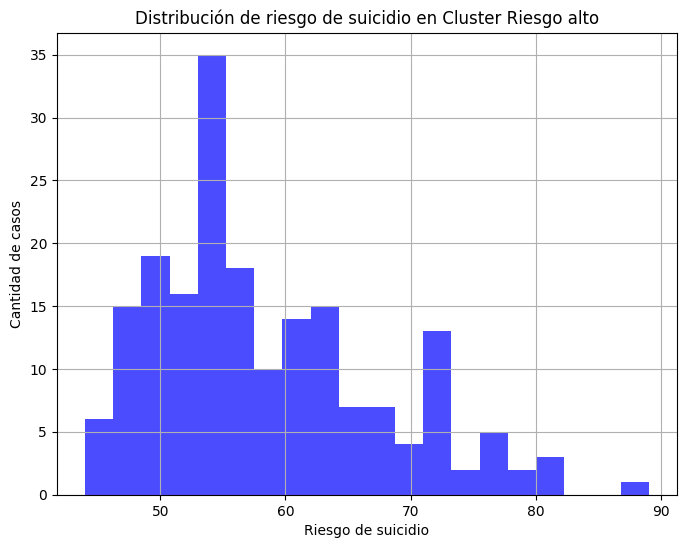

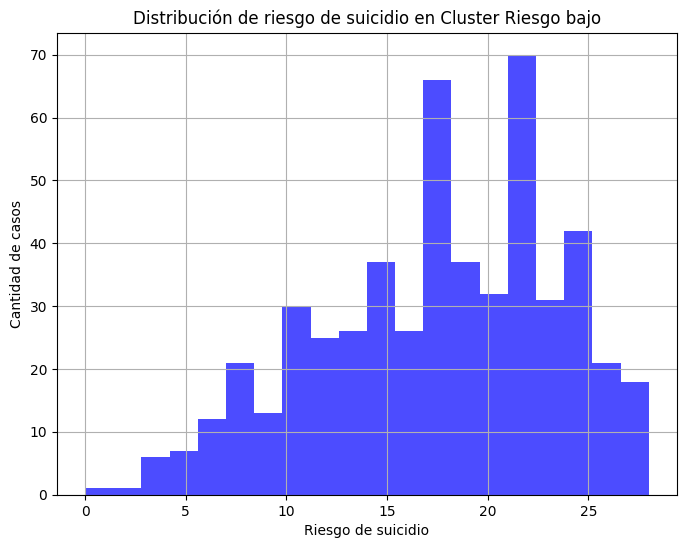

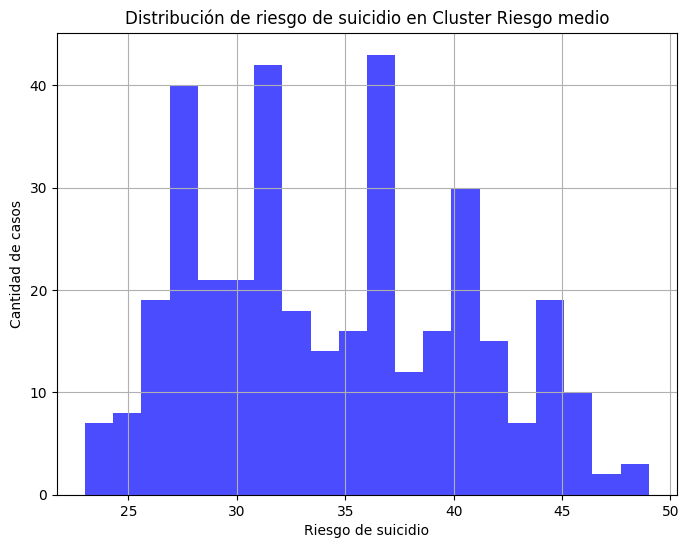

In [40]:
# Crea un gráfico de distribución de riesgo de suicidio en cada Cluster
unique_clusters = np.unique(data_ref['Cluster'])
for cluster in unique_clusters:
    cluster_data = data_ref[data_ref['Cluster'] == cluster]

    plt.figure(figsize=(8, 6))
    plt.hist(cluster_data['SUIC RISK'], bins=20, color='blue', alpha=0.7)

    plt.title(f'Distribución de riesgo de suicidio en Cluster {cluster}')
    plt.xlabel('Riesgo de suicidio')
    plt.ylabel('Cantidad de casos')
    plt.grid(True)

    plt.show()

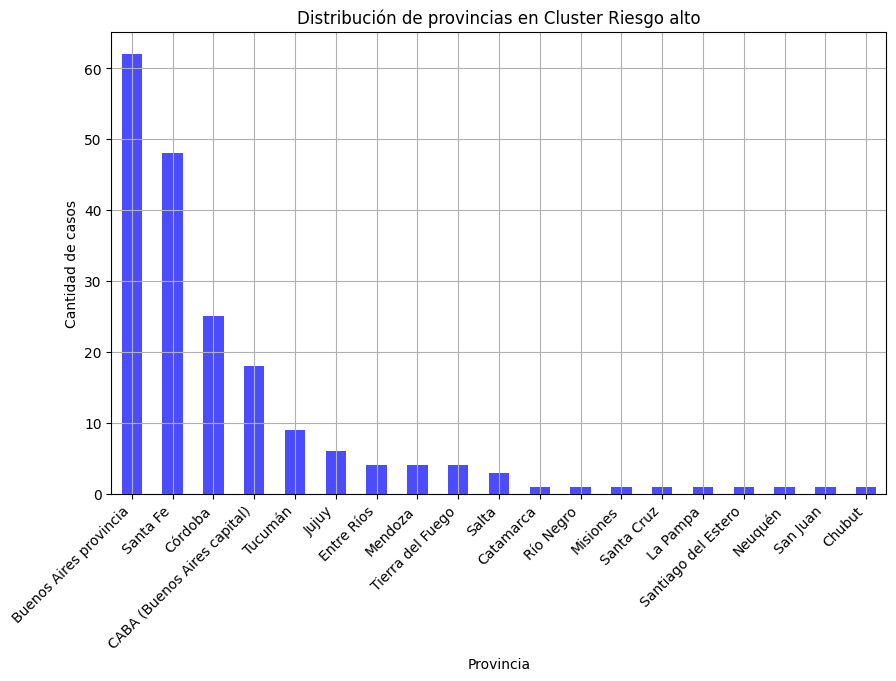

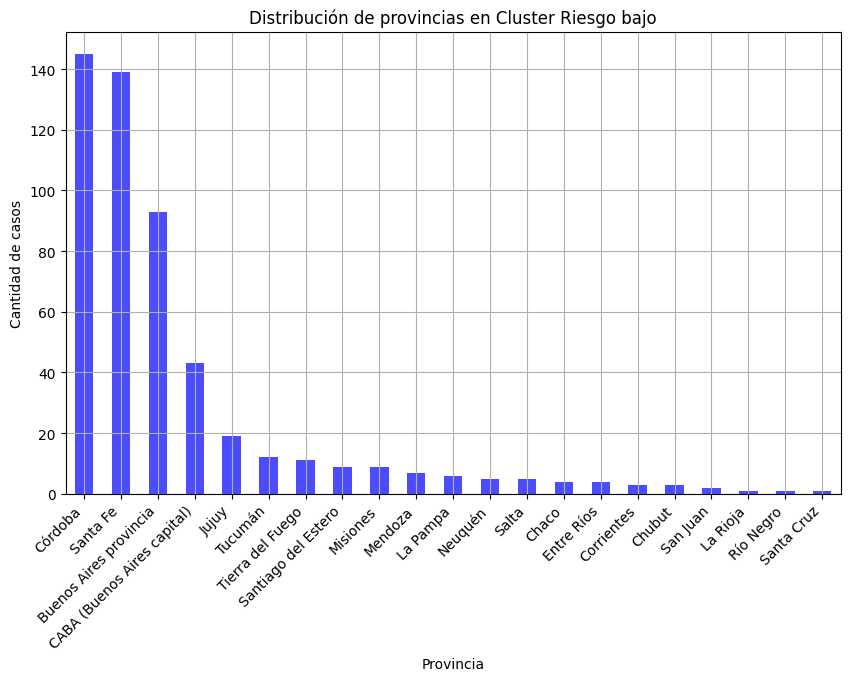

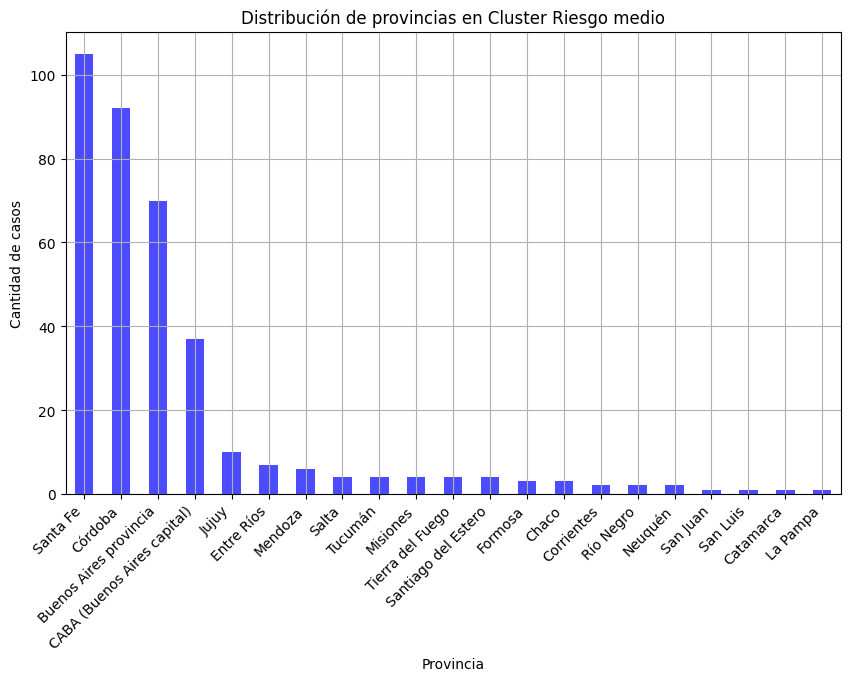

In [41]:
# Crea un gráfico de distribución de provincias para cada cluster
unique_clusters = np.unique(data_ref['Cluster'])
for cluster in unique_clusters:
    cluster_data = data_ref[data_ref['Cluster'] == cluster]
    province_counts = cluster_data['PROVINCE'].value_counts()

    plt.figure(figsize=(10, 6))
    province_counts.plot(kind='bar', color='blue', alpha=0.7)

    plt.title(f'Distribución de provincias en Cluster {cluster}')
    plt.xlabel('Provincia')
    plt.ylabel('Cantidad de casos')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)

    plt.show()

In [42]:
# Encontrar el valor más alto de riesgo de suicidio en cada cluster
max_suic_risk = data_ref.groupby('Cluster')['SUIC RISK'].max()

# Imprimir los valores más altos de riesgo de suicidio por cluster
for cluster, value in max_suic_risk.items():
    print(f"Cluster {cluster}: Valor más alto de riesgo de suicidio: {value}")

Cluster Riesgo alto: Valor más alto de riesgo de suicidio: 89
Cluster Riesgo bajo: Valor más alto de riesgo de suicidio: 28
Cluster Riesgo medio: Valor más alto de riesgo de suicidio: 49


In [ ]:
# Visualizar el registro completo con todas las variables para el valor más alto de riesgo de suicidio en cada cluster
for cluster, value in max_suic_risk.items():
    cluster_data = data_ref[(data_ref['Cluster'] == cluster) & (data_ref['SUIC RISK'] == value)]
    print(f"Cluster {cluster}: Valor más alto de riesgo de suicidio: {value}")
    print(cluster_data)